In [1]:
!pip install surprise > /dev/null
!pip install kaggle --upgrade  > /dev/null

# **cometml import**

In [15]:
# # import comet_ml in the top of your file
# from comet_ml import Experiment
    
# # Add the following code anywhere in your machine learning file
# # experiment = Experiment(api_key="7JvPB1QAeiCQkbkf20a4pIvlB",
#                         project_name="movie-recomendation", workspace="ntiyiso95")

# imports****

In [2]:
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# **loading data**

In [3]:
DATA_PATH = '/home/explore-student/unsupervised_s3_data/unsupervised_movie_data/'
train= pd.read_csv(DATA_PATH+"train.csv")
test= pd.read_csv(DATA_PATH+"test.csv")
movies= pd.read_csv(DATA_PATH+"movies.csv")
sample_sub= pd.read_csv(DATA_PATH+"sample_submission.csv")


# visualization

In [18]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [19]:
train.movieId.nunique(),train.userId.nunique()

(48213, 162541)

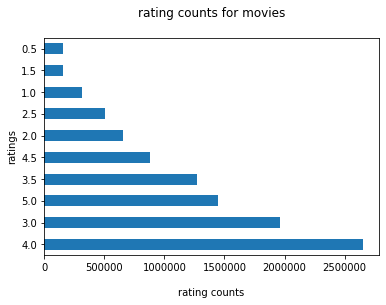

In [20]:
train.rating.value_counts().plot(kind="barh")
plt.xlabel("\nrating counts")
plt.ylabel("ratings")
plt.title("rating counts for movies\n")
plt.show()

In [21]:
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [22]:
test

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318
...,...,...
5000014,162541,4079
5000015,162541,4467
5000016,162541,4980
5000017,162541,5689


In [23]:
test.isnull().sum()

userId     0
movieId    0
dtype: int64

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [25]:
print('Test columns:\n', train.columns)
print('Train columns:\n', test.columns)

Test columns:
 Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Train columns:
 Index(['userId', 'movieId'], dtype='object')


In [26]:
train.rating.tolist()[:5]

[4.0, 4.5, 5.0, 2.0, 3.0]

In [27]:
train_prep = train.copy()

In [28]:
train_prep

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
...,...,...,...,...
10000033,136395,99114,5.0,1521235092
10000034,140078,553,3.0,1002580977
10000035,154807,56782,4.0,1227674807
10000036,85805,327,4.0,1479921530


In [29]:
train.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [30]:
from surprise import SVD
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate



In [31]:
train=train[:50000]

here i was just building a sample model

In [32]:

train=train[:500000]
reader = Reader()
data = Dataset.load_from_df(train.drop('timestamp',1)[['userId', 'movieId', 'rating']], reader)

In [33]:

# We'll use the famous SVD algorithm.
algo = SVD(random_state=42)

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9936  0.9876  1.0131  1.0006  0.9917  0.9973  0.0089  
MAE (testset)     0.7733  0.7695  0.7818  0.7784  0.7718  0.7750  0.0045  
Fit time          2.70    2.72    2.72    2.74    2.72    2.72    0.01    
Test time         0.07    0.07    0.14    0.14    0.14    0.11    0.03    


{'test_rmse': array([0.99356245, 0.9875869 , 1.01306066, 1.00062028, 0.99168039]),
 'test_mae': array([0.77330074, 0.76946053, 0.78179682, 0.77839808, 0.77181447]),
 'fit_time': (2.7025935649871826,
  2.721780776977539,
  2.7240452766418457,
  2.7383317947387695,
  2.719843864440918),
 'test_time': (0.07257843017578125,
  0.0732576847076416,
  0.13952875137329102,
  0.13667702674865723,
  0.13900160789489746)}

In [34]:

sample_sub['rating']= [round(algo.predict(uid=val.userId,iid=val.movieId)[3],1) for _,val in tqdm(test[['userId','movieId']][:].iterrows(), total=len(test)) ] 



In [35]:
sample_sub

,Id,rating
0,1_2011,3.6
1,1_4144,3.7
2,1_5767,3.5
3,1_6711,3.7
4,1_7318,3.1
...,...,...
5000014,162541_4079,3.6
5000015,162541_4467,3.6
5000016,162541_4980,3.4
5000017,162541_5689,3.5


# source

[surprise doc](https://surprise.readthedocs.io/en/stable/getting_started.html)

[make predictions with surprise](https://github.com/NicolasHug/Surprise/issues/215)


In [36]:
sample_sub[['Id','rating']].to_csv('submission.csv',index=False)